In [2]:
# Import all necessary libraries
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Set variables to call APIs
company_summary_base_url = 'https://api.census.gov/data/2018/abscs'
business_char_base_url = 'https://api.census.gov/data/2018/abscb'
owner_char_base_url = 'https://api.census.gov/data/2018/abscbo'
api_key = 'key=54fdac0557ae012c182506724253e238427a8b27'
state = 'for=state:*'
country = 'for=us:*'
metro = 'for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'

In [4]:
# Company summary to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,RCPSZFI,YIBSZFI'

# country, state, or metro options
region = f'get={variables}&{state}'

# call API with URL built from variables
response = requests.get(f'{company_summary_base_url}?{region}&{api_key}')
comp_summary_text = response.json()

# Owner Characteristics to dataframe
# variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F'

# # country, state, or metro options
# region = f'get={variables}&{country}'
# response = requests.get(f'{owner_char_base_url}?{region}&{api_key}')
# owner_char_text = response.json()

# # Business Characteristics to dataframe
# variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,EMPSZFI'

# # country, state, or metro options
# region = f'get={variables}&{country}'
# response = requests.get(f'{business_char_base_url}?{region}&{api_key}')
# business_char_text = response.json()

In [5]:
comp_summary_df = pd.DataFrame(comp_summary_text[1:], columns=comp_summary_text[0])
comp_summary_df = comp_summary_df[(comp_summary_df['NAICS2017']=='62')]
# healthcare and social assistance

comp_summary_df.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,RCPSZFI,YIBSZFI,state
4764,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,14.8,None,10.9,None,001,001,28
4765,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,0.0,None,15.4,None,001,001,28
4766,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,14.0,None,21.9,None,001,001,28
4767,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,30.7,None,44.7,None,001,001,28
4768,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,S,0.0,S,0.0,S,0.0,S,001,001,28


In [6]:
comp_summary_health_df = comp_summary_df[['NAME','EMP','PAYANN']]
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
comp_summary_health_df['Code'] = comp_summary_health_df['NAME'].map(code)
comp_summary_health_df.head()

<ipython-input-6-5d07be4a0f73>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_summary_health_df['Code'] = comp_summary_health_df['NAME'].map(code)


,NAME,EMP,PAYANN,Code
4764,Mississippi,148263,6150851,MS
4765,Mississippi,0,42063,MS
4766,Mississippi,4981,229628,MS
4767,Mississippi,7390,294276,MS
4768,Mississippi,0,0,MS


In [11]:
comp_summary_health_df['EMP'] = comp_summary_health_df['EMP'].astype(int)
num_employees = comp_summary_health_df.groupby('Code')['EMP', 'PAYANN'].sum()
num_employees = num_employees.reset_index()
num_employees.head()

<ipython-input-11-07697aea319d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-07697aea319d>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Code,EMP,PAYANN
0,AK,621968,38551256
1,AL,3870785,190353496
2,AR,2962036,125454308
3,AZ,7516773,332202542
4,CA,39752544,2029024461


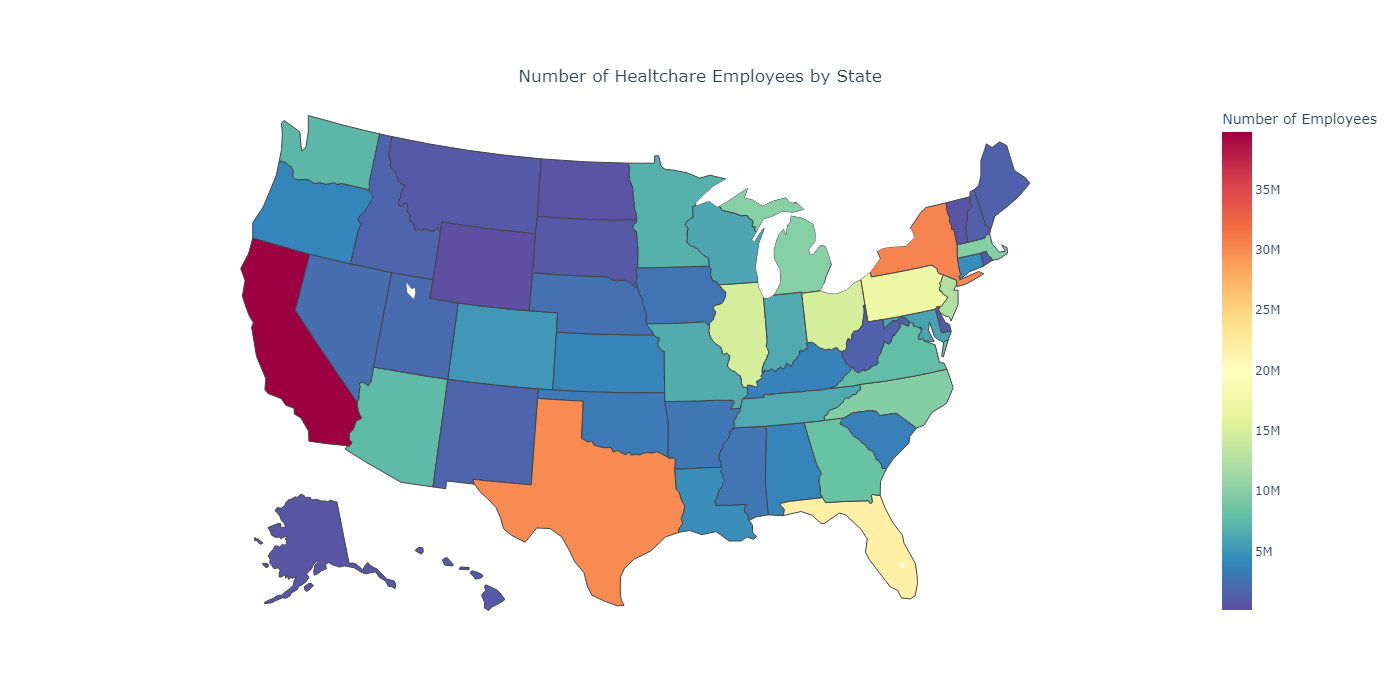

In [19]:

fig = px.choropleth(num_employees,
    locations='Code', 
    color='EMP', 
    color_continuous_scale='spectral_r',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'EMP':'Number of Employees'},
    title = 'Number of Healtchare Employees by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
#fig.write_image("healthcare_employees.png", height=700, width=1400) 

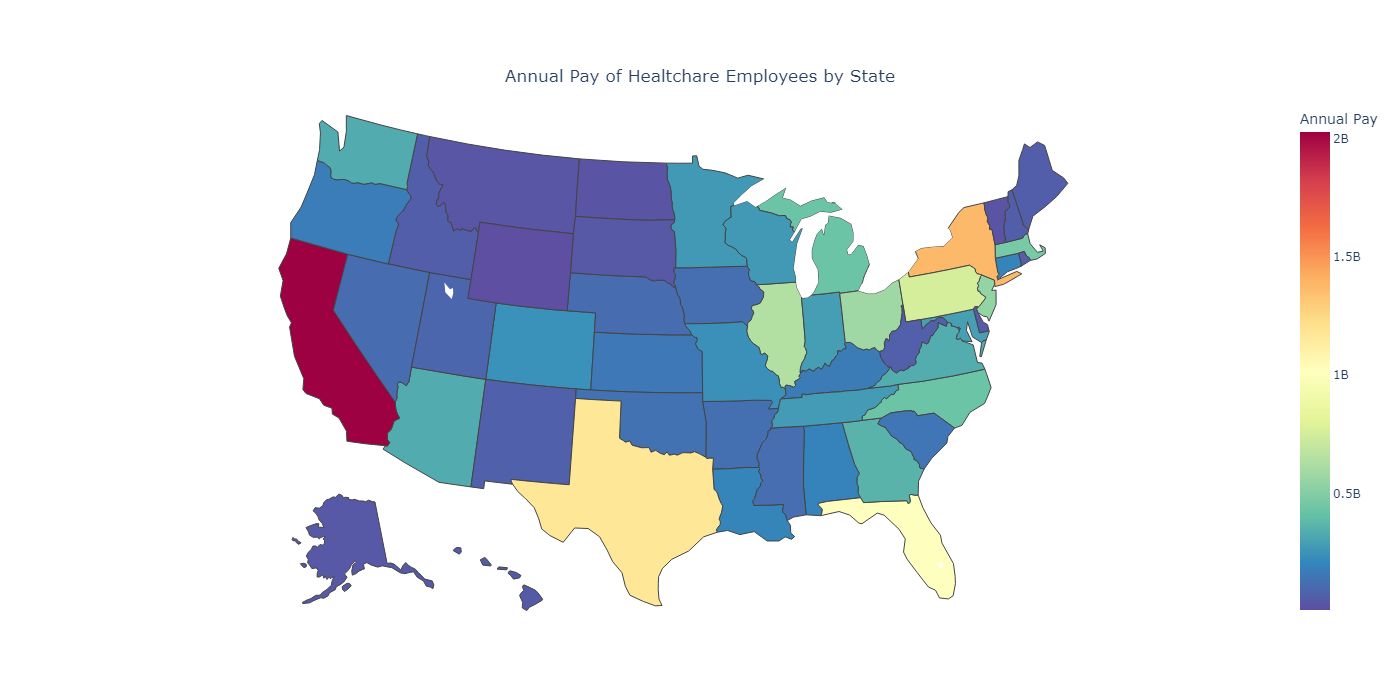

In [20]:
fig = px.choropleth(num_employees,
    locations='Code', 
    color='PAYANN', 
    color_continuous_scale='spectral_r',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'PAYANN':'Annual Pay'},
    title = 'Annual Pay of Healtchare Employees by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
#fig.write_image("healthcare_pay.png", height=700, width=1400) 

In [10]:
fig = px.histogram(comp_summary_health_df, x='NAME', y='EMP',  title='Count of Employees by State', labels={'SEX_LABEL':'Gender', 'NAME':'State', 'PAYANN':'Annual Pay'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 1000)
fig.show()